In [50]:
from matplotlib import pyplot as plt
%matplotlib inline
from astropy.io import ascii
import os
import scipy.stats
import numpy as np
from astropy import units as u
from astropy import constants as c
import sys

import warnings

warnings.filterwarnings('ignore')


In [2]:
homedir = os.getenv("HOME")
gitdir = homedir+'/github/Virgo/'

In [3]:
sys.path.append(homedir+'/github/Virgo/programs')
from virgoCommon import *

Running on Rose's computer


# Read in Kennicutt Halpha Filters #

Rob has a Halphalow and Halphahigh filters.  Got transmission curves from 

http://mogit.as.arizona.edu/90prime_files/Documents/filters/90Prime_filter_tracings/Halpha%20filters.txt

File has transmission for zero deg angle of incidence and 10 deg incidence.


Saved files in ~/github/Virgo/observing/

In [5]:
filepath = gitdir+'observing/'
halow_zero = filepath+'halphalow-zerodeg.txt'
halow_ten = filepath+'halphalow-tendeg.txt'
hahigh_zero = filepath+'halphahigh-zerodeg.txt'
hahigh_ten = filepath+'halphahigh-tendeg.txt'

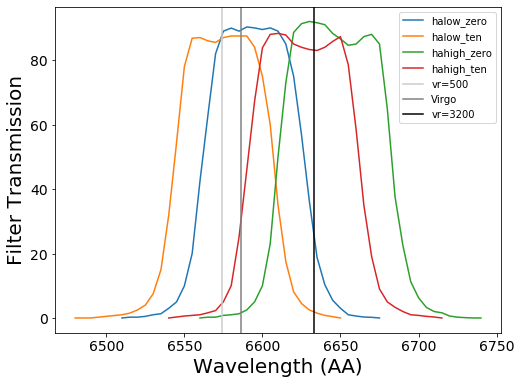

In [64]:
filters = [halow_zero,halow_ten,hahigh_zero,hahigh_ten]
filter_names = ['halow_zero','halow_ten','hahigh_zero','hahigh_ten']
plt.figure(figsize=(8,6))
for i in range(len(filters)):
    d = ascii.read(filters[i])
    plt.plot(d['col1'],d['col2'],label=filter_names[i])


# add virgo
# recession velocity ~ VC = 1050+/-35km s^-1^ from 
#  Binggeli, B.; Popescu, C. C.; Tammann, G. A.
# https://ui.adsabs.harvard.edu/abs/1993A%26AS...98..275B/abstract
# 
# assume a velocity disp of 1000 km/s

lambda_0 = 6563. # angstrom
vcenter = 1050#*u.km/u.s
width = 1000#*u.km/u.s
zcenter = vcenter/3.e5
lambda_obs_center = lambda_0*(1+zcenter)

vmin = vcenter - 0.5*width
zmin = vmin/3.e5
lambda_obs_min = lambda_0*(1+zmin)

vmax = vcenter + 0.5*width
zmax = vmax/3.e5
lambda_obs_max = lambda_0*(1+zmax)

mean = lambda_obs_center 
std = lambda_obs_max - lambda_obs_min


plt.axvline(x=lambda_0*(500./3.e5+1),label='vr=500',color='.8')
plt.axvline(x=lambda_obs_center,ls='-',color='0.5',label='Virgo')
plt.axvline(x=lambda_0*(3200./3.e5+1),label='vr=3200',color='k')
#plt.axvline(x=lambda_obs_min,ls='--',color='k')
#plt.axvline(x=lambda_obs_max,ls='--',color='k')

plt.legend()
plt.xlabel('Wavelength (AA)',fontsize=20)
plt.ylabel('Filter Transmission',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#x_min = 6500
#x_max = 6750
##plt.figure()
#x = np.linspace(x_min, x_max, 100)
#y = scipy.stats.norm.pdf(x,mean,std)
#plt.plot(x,4000*y,'k-',label='Virgo cluster')

plt.savefig('kennicutt_halpha.pdf')

# 2021 Observing Runs

* the info above is from 2020 - never observed

* we need to figure out filter and targets 

In [4]:
plotdir = '/home/rfinn/research/Virgo/plots/'
os.chdir(plotdir)

In [5]:
%run ~/github/Virgo/programs/readtables.py

number of CO with Halpha =  145
number of CO without Halpha =  97


Text(0.5, 1.0, 'Filamentary Structures Surrounding the Virgo Cluster')

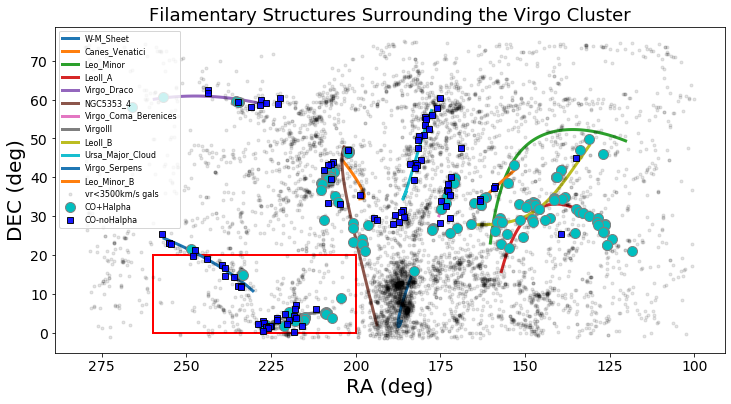

In [17]:
plt.figure(figsize=(12,6))
plot_spines()
plt.plot(v.main['RA'],v.main['DEC'],'k.',alpha=.1,label='vr<3500km/s gals')
# plot CO sources
flag = v.main['COflag'] & v.main['HAobsflag']
print('number of CO with Halpha = ',sum(flag))
plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'co',markersize=10,alpha=1,label='CO+Halpha',mec='0.5')
flag = v.main['COflag'] & ~v.main['HAobsflag']
print('number of CO without Halpha = ',sum(flag))
plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'bs',alpha=.9,mec='k',markersize=6,label='CO-noHalpha')


# add a rectangle for Blanco DD time, spring 2021
rect = Rectangle([200,0], 60, 20, fc="none",ec='r',lw=2,label='DECcam targets')
plt.gca().add_artist(rect)

# add a rectangle for Blanco DD time, spring 2021
#rect = Rectangle([178,-1], 20, 20, fc="none",ec='b',lw=2,label='Virgo Cluster')
#plt.gca().add_artist(rect)

#plt.axis([195,265,-2,30])
# continue with plot
plt.gca().invert_xaxis()
plt.xlabel('RA (deg)',fontsize=20)
plt.ylabel('DEC (deg)',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper left',fontsize=8)
plt.title('Filamentary Structures Surrounding the Virgo Cluster',fontsize=18)

# TODO for March 12-15 and April 13-17 90prime Runs

* email Dick Joyce, Melanie, Dara, Dennis about borrowing Halpha+4nm filter for 90prime
  - confirm that filter is available and exchange between kpno and steward is feasible
  
* airmass plots for general regions

* footprint of 90prime?
  - 1.16 x 1.16 deg 
  - 1.1 x 1.1 deg with mosaic filters (5.75 in, vs 6 in required for full FOV)

* finding charts for 97 remaining CO sources
  - github/Virgo/programs/kpno-halpha.p3.py
  
* Blanco+DECcam time at end of March 24-26

In [18]:
5.75/6*1.16

1.1116666666666666

# Finding Charts

In [39]:
os.chdir(homedir+'/research/Virgo/observing/')
%run ~/github/Virgo/programs/observing-halpha.py
print(len(pointing_ra))

/home/rfinn/github/Virgo/programs/observing-halpha.py:249: RuntimeWarning: divide by zero encountered in log10
  pointing_mag = 22.5 - 2.5 * np.log10(v.nsav0['NMGY'][:,4][obs_mass_flag])


nsa id not found in list of pointings
108


<Figure size 432x288 with 0 Axes>

In [31]:
os.mkdir('2021Mar')

In [36]:
pointing_id[0]

'VFID1728'

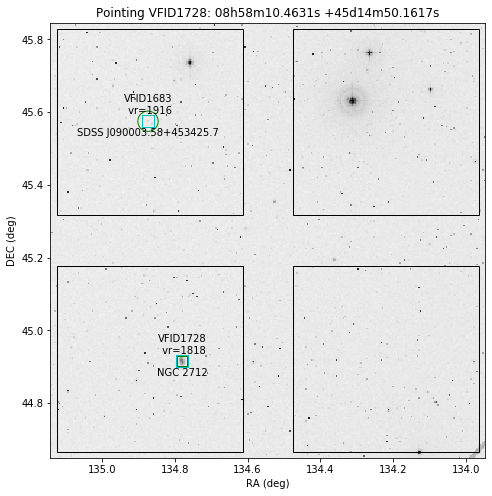

In [40]:
platinum_finding_chart(1,BOK=True)
#plot_BOK_footprint(pointing_ra[0],pointing_dec[0])

nsa id not found in list of pointings
134.3769295 45.24726713333334 1.2 1.2
pointing  VFID0000  ngal =  2
138.772066 25.76255593333333 1.2 1.2
pointing  VFID0001  ngal =  2
158.344699 38.004936533333336 1.2 1.2
pointing  VFID0002  ngal =  1
158.56770400000002 37.65798723333334 1.2 1.2
pointing  VFID0003  ngal =  2
162.65982250000002 34.816331733333335 1.2 1.2
pointing  VFID0004  ngal =  2
162.7837705 34.243691633333334 1.2 1.2
pointing  VFID0005  ngal =  4
168.27312016666667 47.8970974 1.2 1.2
pointing  VFID0006  ngal =  5
171.3414175 40.346400333333335 1.2 1.2
pointing  VFID0007  ngal =  4
171.50245 29.844341733333334 1.2 1.2
pointing  VFID0008  ngal =  2
171.5460145 25.994413233333333 1.2 1.2
pointing  VFID0009  ngal =  5
171.7255045 35.74728603333334 1.2 1.2
pointing  VFID0010  ngal =  4
172.13897949999998 38.57401023333333 1.2 1.2
pointing  VFID0011  ngal =  5
172.28970700000002 36.934068833333335 1.2 1.2
pointing  VFID0012  ngal =  5
172.510063 37.03135793333333 1.2 1.2
pointing  

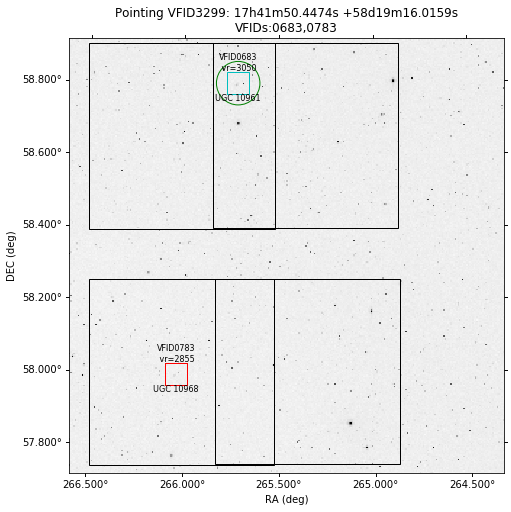

In [184]:
os.chdir(homedir+'/research/Virgo/observing/')
%run ~/github/Virgo/programs/observing-halpha.py
make_all_platinum(BOK=True)

# Adding shifts to maximize the number of galaxies in each pointing

* for 90prime, our main targets are going in the bottom two chips.

In [85]:
ra = v.main['RA']
dec = v.main['DEC']
cra,cdec,dra,ddec = 233.85566083333333, 59.70875456666667, 1.2, 1.2
ramin = cra-.5*dra
ramax = cra + 0.5*dra
decmin = cdec-.5*ddec
decmax = cdec + 0.5*ddec
flag = (ra > ramin) & (ra < ramax) & (dec > decmin) & (dec < decmax)
print(sum(flag))

5


In [91]:
v.main['RA'][v.main['VFID']=='VFID0603']

234.4723275


nsa id not found in list of pointings
233.85566083333333 59.70875456666667 1.2 1.2
pointing  VFID0090  ngal =  8


<Figure size 432x288 with 0 Axes>

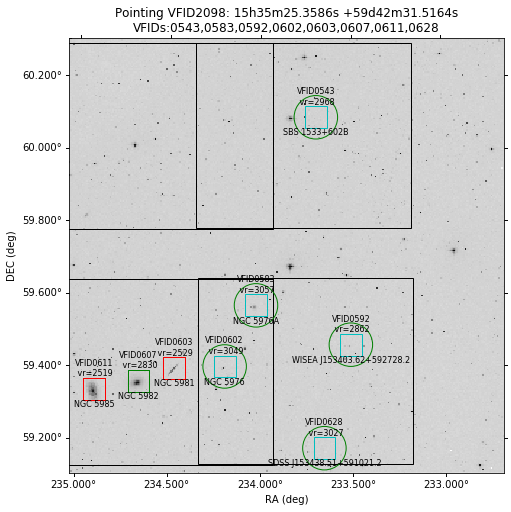

In [209]:
os.chdir('/home/rfinn/research/Virgo/finding-charts/2021Mar/')
%run ~/github/Virgo/programs/observing-halpha.py
platinum_finding_chart(vfdict['VFID0603'],BOK=True)
#rect = plt.Rectangle((233.85566083333333, 59.70875456666667),10,10,color='r')
#plt.gca().add_artist(rect)

In [156]:
help(fits.writeto)

Help on function writeto in module astropy.io.fits.convenience:

writeto(filename, data, header=None, output_verify='exception', overwrite=False, checksum=False)
    Create a new FITS file using the supplied data/header.
    
    Parameters
    ----------
    filename : file path, file object, or file like object
        File to write to.  If opened, must be opened in a writeable binary
        mode such as 'wb' or 'ab+'.
    
    data : array, record array, or groups data object
        data to write to the new file
    
    header : `Header` object, optional
        the header associated with ``data``. If `None`, a header
        of the appropriate type is created for the supplied data. This
        argument is optional.
    
    output_verify : str
        Output verification option.  Must be one of ``"fix"``, ``"silentfix"``,
        ``"ignore"``, ``"warn"``, or ``"exception"``.  May also be any
        combination of ``"fix"`` or ``"silentfix"`` with ``"+ignore"``,
        ``+warn

# Airmass Plots for 2021-March Bok Run



nsa id not found in list of pointings
plotting airmass curves for Kitt Peak
14
plot 1 of 14
plot 2 of 14
plot 3 of 14
plot 4 of 14
plot 5 of 14
plot 6 of 14
plot 7 of 14
plot 8 of 14
plot 9 of 14
plot 10 of 14
plot 11 of 14
plot 12 of 14
plot 13 of 14
plot 14 of 14


<Figure size 432x288 with 0 Axes>

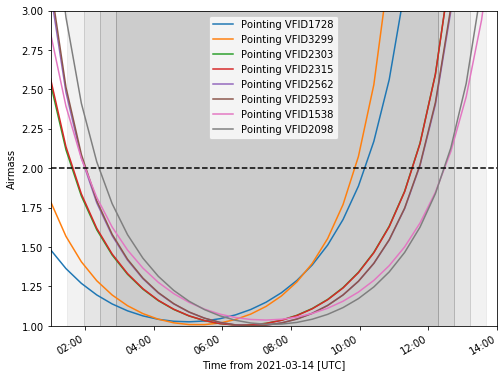

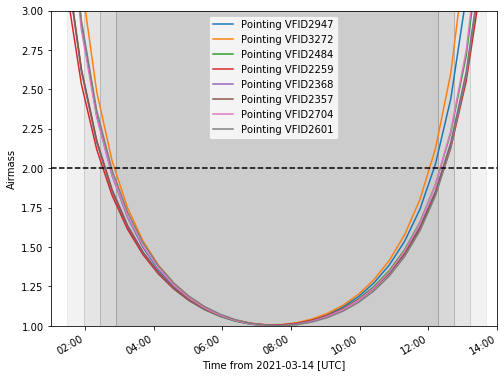

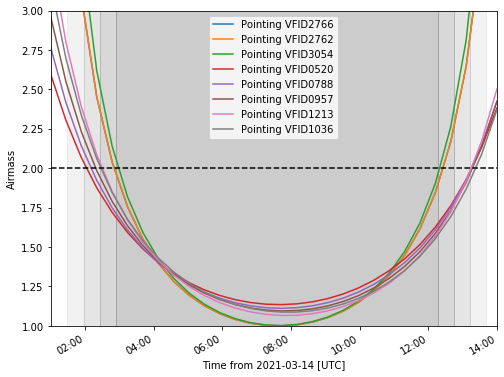

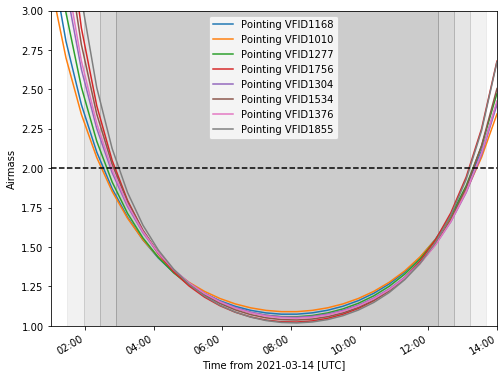

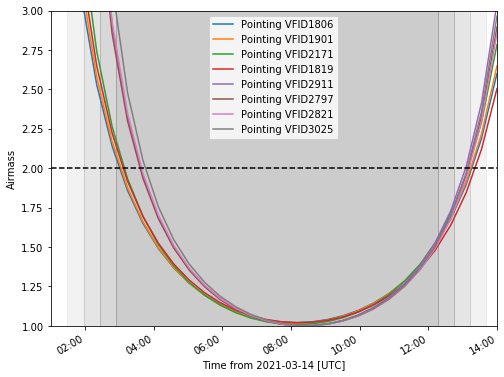

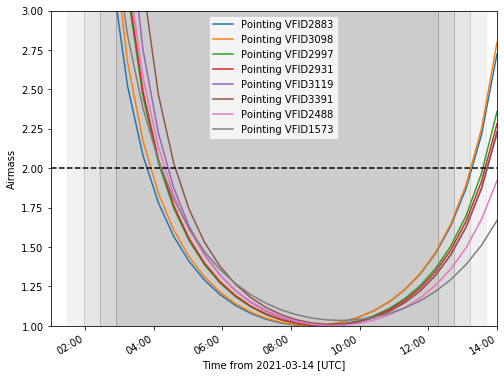

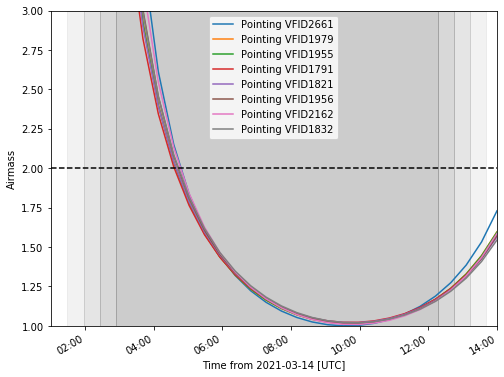

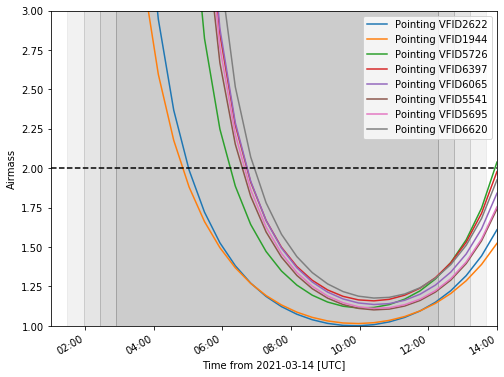

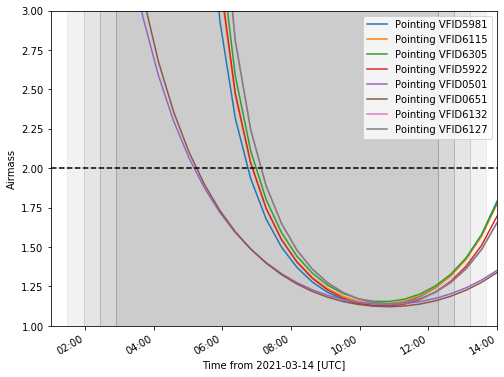

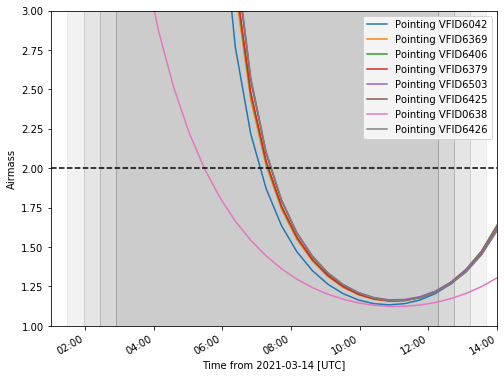

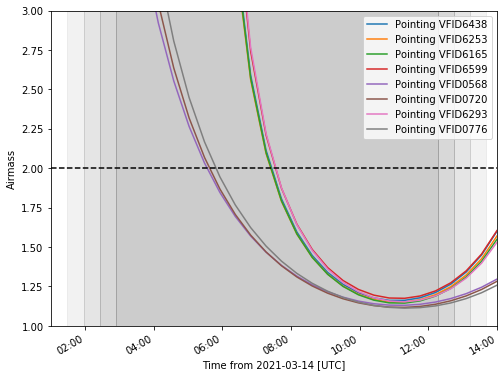

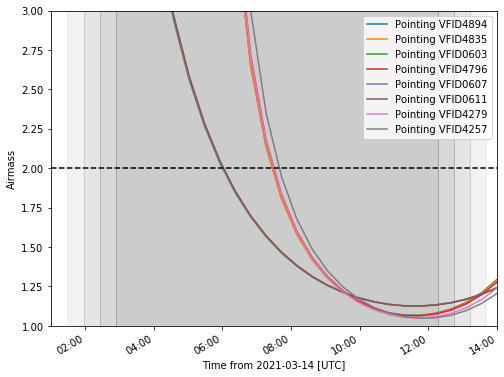

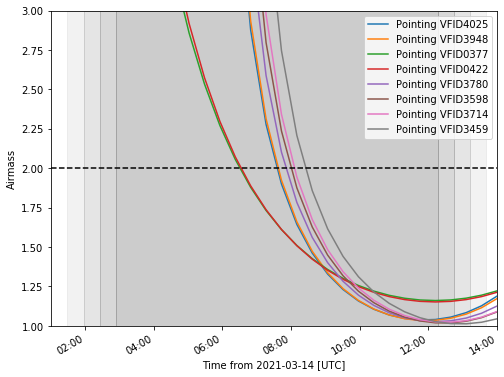

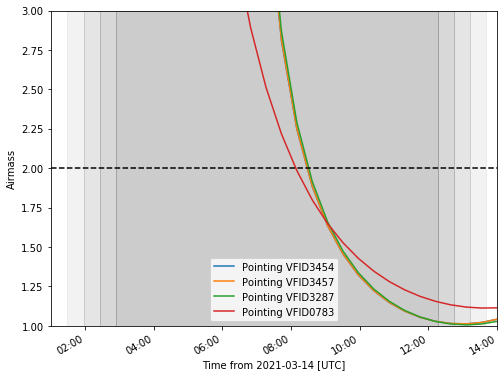

In [54]:
%run ~/github/Virgo/programs/observing-halpha.py
airmass_plotsv2(pointing_id,KPNO=True)

# Things to check

* (filter correction < 2. and CO) and Becky images (Virgo III)
* are r and Halpha expected to have the same focus?  If not, what is the typical offset between the two?
  * will need to focus in each filter and measure the offset
  
* finding charts 
* dither script for each object and filter
  * Greg is doing this
  * program is in github/Virgo/programs/
* airmass plots

* observing plan for each night